## Phase 2 Data Science Project.

* Student name: 
    #### - Jubilant Mutuku
    #### - Esther Nyawera
    #### - Miriam Nguru 
    #### - Yusra Mohamed 
    #### - Ian Kedeyie 
    #### - Abdideq Adan 


* Student pace:Full time DSTF-06
* Scheduled project review date/time: 
* Instructor name: Diana Mongina, Lucile Kaleha, Nikita Njoroge



## Multiple Linear Regression Modeling to analyze house sales in King County 

#

# 1. Problem Description


The aim of this project is to develop a Multiple Linear Regression Model to accurately predict the sale prices of houses in King County. Through careful data analysis and exploratory data analysis techniques, we will preprocess and clean the dataset to create a dataframe for regression modeling. By  analyzing key features such as square footage, number of bedrooms, location(waterfront or not), and more, we aim to uncover valuable insights that influence house prices.

# 2. Business Objective
Business understanding is essential for a real estate agents, realtors and sellers to effectively serve their clients.It serves as the foundation for successful operations and sustainable growth in the real estate industry.We will need to understand the listing prices and how they affects buyers and sellers in making informed decisions. Identifying the expectations, preferences and needs of the clients, knowing what the clients want from the agency’s services especially in terms of property evaluation is crucial. Factors considered in evaluation are: I. Size and layout, the size of the property, the number of bedrooms and bathrooms and the layout is crucial. II. Condition, the property’s condition, including any need of repairs or renovations can affect its value. III. Location: The property location influences its value, factors like proximity to school, parks, shopping malls and transportation can impact the value Gaining insight into the local housing market dynamics in the dataset such as the fluctuations in supply and demand, seasonality, and regional variations in property value is important .

 

In [147]:
# importing all necessary modules
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## **Step 1: Reading and Understanding the Data**
Let's start with the following steps:

    - Importing data using the pandas library
    - Understanding the structure of the data

In [148]:
# Reading data
df = pd.read_csv("./data/kc_house_data.csv", index_col=0)
df.columns.name = df.index.name
df.index.name = None
df

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [149]:
df.shape

(21597, 20)

In [150]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object', name='id')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 1

In [152]:
df.describe()

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Step 2 : Data Cleaning and Preparation**

In [153]:
# Removing recommended columns
df.drop(["date","view","sqft_above", "sqft_basement","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"], axis=1, inplace=True)
df

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [154]:
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [155]:
df.isna().sum()

id
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [156]:
df.dropna(inplace=True)

In [157]:
new_waterfront = {
    "NO":0,
    "YES":1
}
# df['waterfront'].str.replace(new_Waterfront)
new_cond = {
    'Very Good':5,
    'Average':4,
    'Good':3,
    'Poor':2,
    'Fair':1
}

new_grade = {
    '3 Poor':1,
    '4 Low':2,
    '5 Fair':3,
    '6 Low Average':4,
    '7 Average':5,
    '8 Good':6,
    '9 Better':7,
    '10 Very Good':8,
    '11 Excellent':9,
    '12 Luxury':10,
    '13 Mansion':11
}

df['waterfront'] = df['waterfront'].replace(new_waterfront)
df['condition'] = df['condition'].replace(new_cond)
df['grade'] = df['grade'].replace(new_grade)
df

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6414100192,538000.0,3,2.25,2570,7242,2.0,0,4,5,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0,4,4,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,5,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0,4,6,1987
7237550310,1230000.0,4,4.50,5420,101930,1.0,0,4,9,2001
...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1310,1294,2.0,0,4,6,2008
263000018,360000.0,3,2.50,1530,1131,3.0,0,4,6,2009
6600060120,400000.0,4,2.50,2310,5813,2.0,0,4,6,2014
1523300141,402101.0,2,0.75,1020,1350,2.0,0,4,5,2009


In [158]:
df = df[df['bedrooms'] != 33]
df

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6414100192,538000.0,3,2.25,2570,7242,2.0,0,4,5,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0,4,4,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,5,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0,4,6,1987
7237550310,1230000.0,4,4.50,5420,101930,1.0,0,4,9,2001
...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1310,1294,2.0,0,4,6,2008
263000018,360000.0,3,2.50,1530,1131,3.0,0,4,6,2009
6600060120,400000.0,4,2.50,2310,5813,2.0,0,4,6,2014
1523300141,402101.0,2,0.75,1020,1350,2.0,0,4,5,2009


In [165]:
df = df.drop_duplicates()

In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
price,19220.0,541634.716233,372256.795384,78000.0,322000.00,450000.00,644125.0,7700000.0
bedrooms,19220.0,3.373101,0.903638,1.0,3.00,3.00,4.0,11.0
bathrooms,19220.0,2.117092,0.769592,0.5,1.75,2.25,2.5,8.0
sqft_living,19220.0,2082.444953,922.562829,370.0,1430.00,1920.00,2550.0,13540.0
sqft_lot,19220.0,15074.233455,40818.299287,520.0,5040.00,7620.00,10717.0,1651359.0
floors,19220.0,1.495057,0.540158,1.0,1.00,1.50,2.0,3.5
waterfront,19220.0,0.007596,0.086827,0.0,0.00,0.00,0.0,1.0
condition,19220.0,3.789126,0.611318,1.0,3.00,4.00,4.0,5.0
grade,19220.0,5.661082,1.176019,1.0,5.00,5.00,6.0,11.0


## **step 3: Vitualization**

* Price spreed and Distribution
* Vitualizing categorical data
  - Waterfront	
  - condition	
  - grade
  - bedrooms
* Vitualizing numerical data


## 3.1 Price spreed and Distribution

/tmp/ipykernel_61108/137592402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, kde=True, ax=ax1)


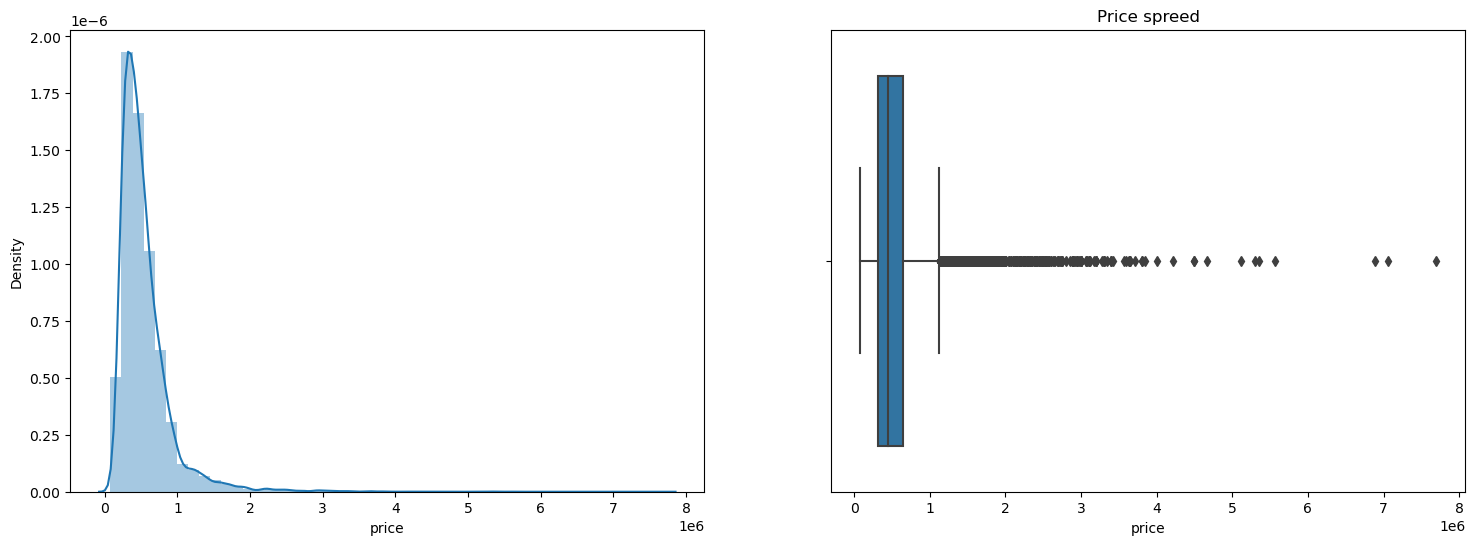

In [205]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

plt.title("Price distribution")
sns.distplot(df.price, kde=True, ax=ax1)

plt.title("Price spreed")
sns.boxplot(x=df['price'], ax=ax2)
plt.show()


### Inference
* The plot right-skewed, meaning that the most prices in the dataset are low than.
* There is a significant difference between the mean and the median of the price distribution.

In [206]:

# boxplot = df.boxplot(column = ["price", "bedrooms", "bathrooms","sqft_living","floors", "sqft_lot", "sqft_lot","yr_built"])

### 3.2 Vitualizing cetegorical data

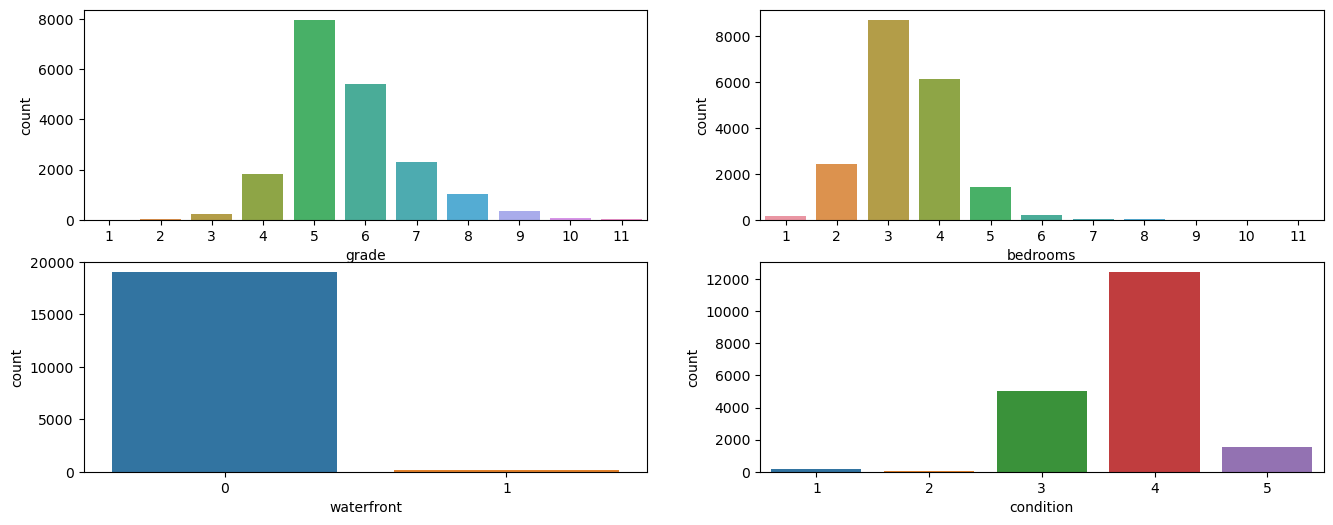

In [220]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 6))

sns.countplot(x='grade', data=df, ax=axes[0, 0])
sns.countplot(x='bedrooms', data=df, ax=axes[0, 1])
sns.countplot(x='waterfront', data=df, ax=axes[1, 0])
sns.countplot(x='condition', data=df, ax=axes[1, 1])

plt.show()

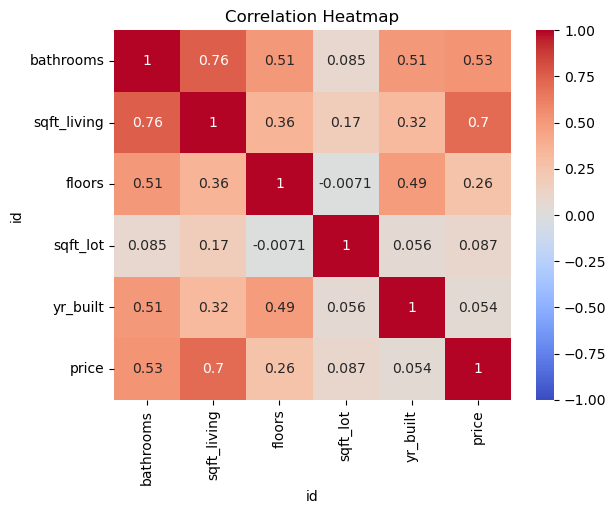

In [225]:
selected_columns = ["bathrooms", "sqft_living", "floors", "sqft_lot", "yr_built", "price"]

# Subset the DataFrame with selected columns
columns_subset = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = columns_subset.corr()

# Extract the correlation of each column with 'price'
correlation_with_price = correlation_matrix['price']

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

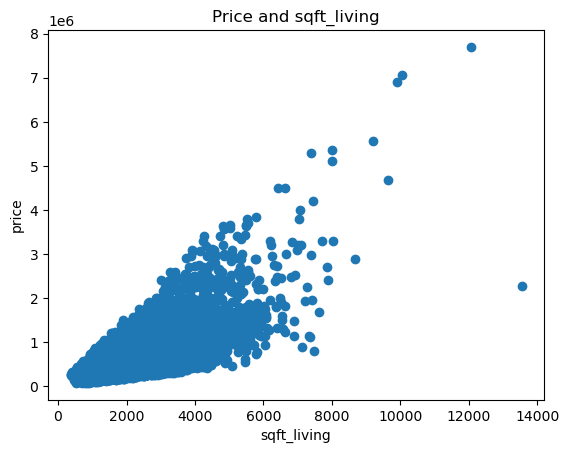

In [233]:
plt.title("Price and sqft_living")
plt.xlabel("sqft_living")
plt.ylabel("price")

plt.scatter(y=df['price'], x=df['sqft_living'])